In [110]:
import pandas as pd

In [111]:
df_ = pd.read_csv('Advertising Budget and Sales.csv')
df = df_.copy()

df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


check data

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [113]:
df.shape

(200, 5)

In [114]:
df.isna().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [115]:
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [116]:
df = df.drop(columns= 'Unnamed: 0')

In [117]:
df.columns = df.columns.str.replace(' ', '_')

ROI calculation

it seems like incorrect data, so I decided to increase the Sales by 10 times :) only in not real life scenarios

In [118]:
df['Sales_($)'] = df['Sales_($)']*10

In [119]:
df['Amount_spent'] = df['TV_Ad_Budget_($)'] + df['Radio_Ad_Budget_($)'] + df['Newspaper_Ad_Budget_($)']

df['ROI'] = (df['Sales_($)'] - df['Amount_spent']) / df['Amount_spent']*100

df.head()

,TV_Ad_Budget_($),Radio_Ad_Budget_($),Newspaper_Ad_Budget_($),Sales_($),Amount_spent,ROI
0,230.1,37.8,69.2,221.0,337.1,-34.440819
1,44.5,39.3,45.1,104.0,128.9,-19.317300
2,17.2,45.9,69.3,93.0,132.4,-29.758308
3,151.5,41.3,58.5,185.0,251.3,-26.382809
4,180.8,10.8,58.4,129.0,250.0,-48.400000


still we have some unpleasant results, but let's imagine we have a really bad company's data and work with it

now i plan make four categories for campaigns' ROI: very unprofitable, unprofitable, profitable, highly profitable

In [120]:
def category(roi):
    if roi <=-15: return 'very unprofitable'
    elif -15< roi <=0: return 'unprofitable'
    elif 0 < roi <= 15: return 'profitable'
    else: return 'very profitable'
    
df['Profit'] = df['ROI'].apply(category)

df.head() 

,TV_Ad_Budget_($),Radio_Ad_Budget_($),Newspaper_Ad_Budget_($),Sales_($),Amount_spent,ROI,Profit
0,230.1,37.8,69.2,221.0,337.1,-34.440819,very unprofitable
1,44.5,39.3,45.1,104.0,128.9,-19.317300,very unprofitable
2,17.2,45.9,69.3,93.0,132.4,-29.758308,very unprofitable
3,151.5,41.3,58.5,185.0,251.3,-26.382809,very unprofitable
4,180.8,10.8,58.4,129.0,250.0,-48.400000,very unprofitable


<Axes: xlabel='Profit'>

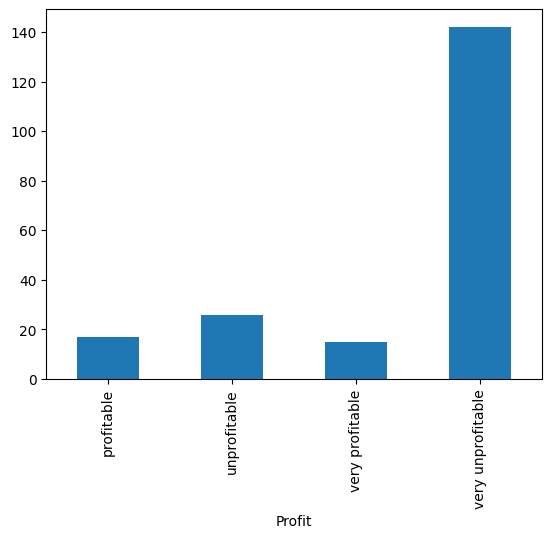

In [121]:
df.groupby('Profit').size().plot(kind="bar")

so now we clearly see, that most of campaigns are very unprofitable, and only few of them are more or less profitable. let's find out if these profits can cover that loss 

In [122]:
balance = df['Sales_($)'].sum() - df['Amount_spent'].sum()
print(balance)

-12127.099999999999


so after few simple calculations we see that company is in 12 127.1 $ debt

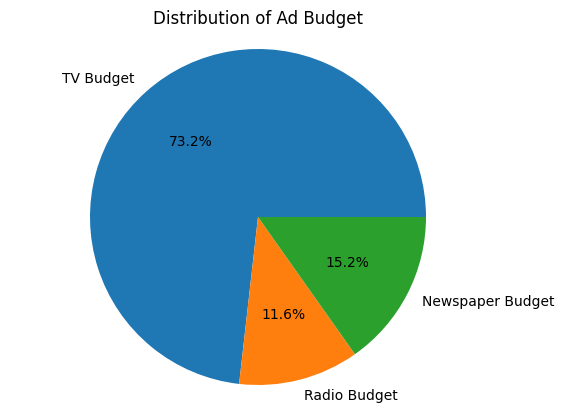

In [123]:
import matplotlib.pyplot as plt

total_sum = df['Amount_spent'].sum()
sums = [df['TV_Ad_Budget_($)'].sum(), df['Radio_Ad_Budget_($)'].sum(), df['Newspaper_Ad_Budget_($)'].sum()]
columns = ['TV Budget', 'Radio Budget', 'Newspaper Budget']

plt.pie(sums, labels=columns, autopct='%1.1f%%')
plt.title('Distribution of Ad Budget')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


from that chart we can see that most of the budget was distributed to TV ads

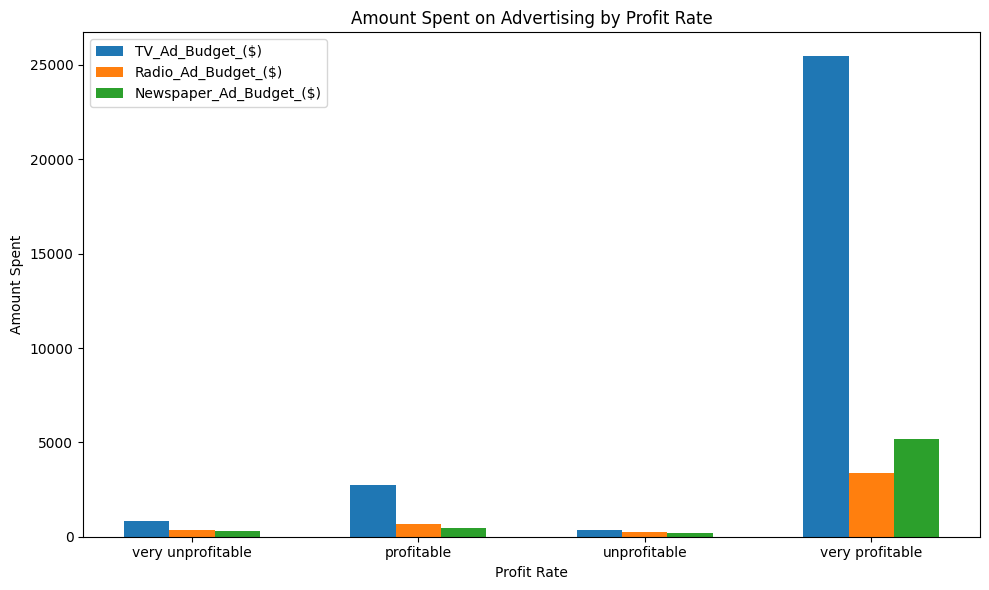

In [124]:
grouped_data = df.groupby('Profit')[['TV_Ad_Budget_($)', 'Radio_Ad_Budget_($)', 'Newspaper_Ad_Budget_($)']].sum()
profit_rates = df['Profit'].unique()

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(profit_rates))
for i, col in enumerate(grouped_data.columns):
    ax.bar(index + i * bar_width, grouped_data[col], bar_width, label=col)

ax.set_xlabel('Profit Rate')
ax.set_ylabel('Amount Spent')
ax.set_title('Amount Spent on Advertising by Profit Rate')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(profit_rates)
ax.legend()

plt.tight_layout()
plt.show()


so we got these results and based on them, my advice will be to cut expenses on the TV ads